In [1]:
import numpy as np
import spectral as sp
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
!ls ../data/

300091.jpg  indianapines_gt.npy  Rosa_Gold_Glow_2_small_noblue.png  salinas.npy
86000.jpg   indianapines.npy	 salinas_gt.npy


In [3]:
# indiana_img = np.load('../data/indianapines.npy')
# indiana_labels = np.load('../data/indianapines_gt.npy')
img = np.load('../data/salinas.npy')
labels = np.load('../data/salinas_gt.npy')

In [4]:
img.shape

(512, 217, 204)

In [5]:
labels.shape

(512, 217)

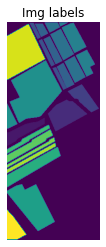

In [6]:
plt.imshow(labels)
plt.axis('off')
plt.title('Img labels')
plt.show()

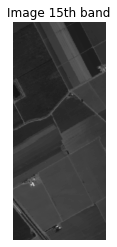

In [8]:
plt.imshow(img[:, :, 15], cmap='gray')
plt.axis('off')
plt.title('Image 15th band')
plt.show()

In [9]:
# normalize radiance values to get reflectance values
img = img / img.max()

In [10]:
row, col, dim = img.shape

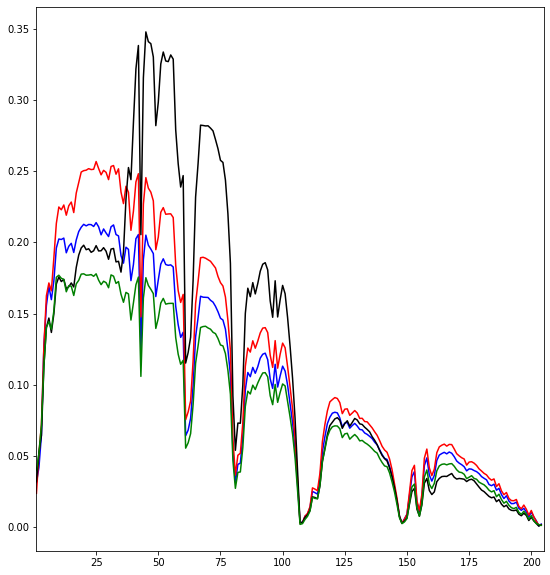

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(np.arange(1,dim+1),img[100,100,:],'b')
plt.plot(np.arange(1,dim+1),img[100,120,:],'r')
plt.plot(np.arange(1,dim+1),img[120,100,:],'k')
plt.plot(np.arange(1,dim+1),img[120,120,:],'g')
plt.xlim(1,dim+1)
plt.show()

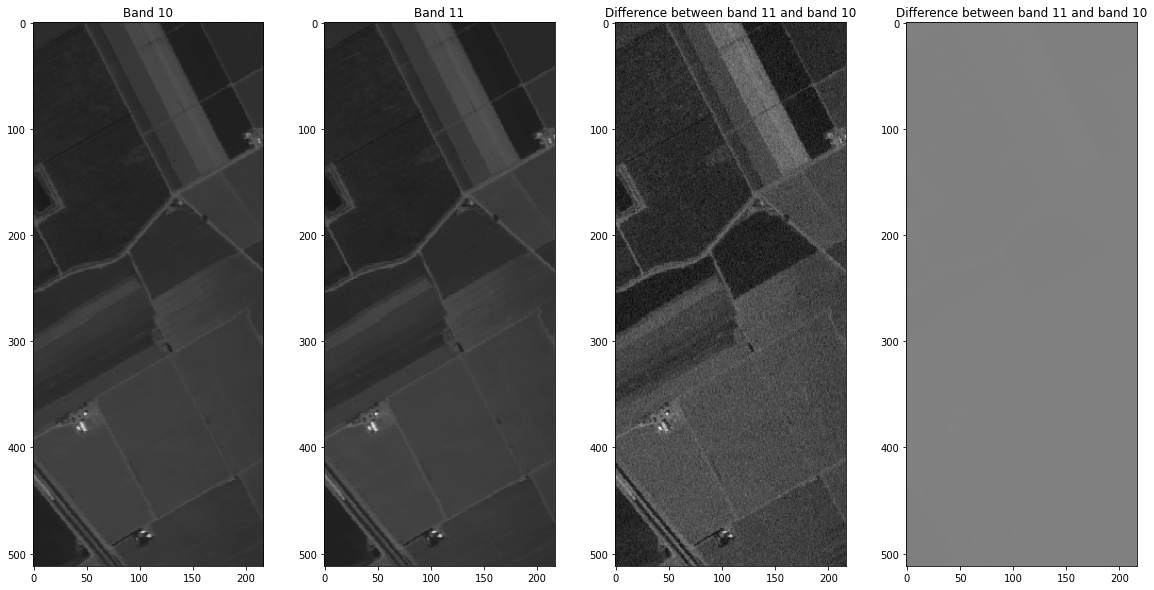

In [12]:
band = 10
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('Band %d'%band)
plt.imshow(img[:,:,band], cmap='gray', vmin=0, vmax=1)
plt.subplot(142)
plt.title('Band %d'%(band+1))
plt.imshow(img[:,:,band + 1],cmap='gray', vmin=0, vmax=1)
plt.subplot(143)
plt.title('Difference between band %d and band %d'%(band+1, band))
plt.imshow(img[:,:,band + 1] - img[:,:,band], cmap='gray')
plt.subplot(144)
plt.title('Difference between band %d and band %d'%(band+1, band))
plt.imshow(img[:,:,band + 1] - img[:,:,band], cmap='gray', vmin=-1, vmax=1)
plt.show()

In [15]:
np.corrcoef(img[:,:,band].ravel(),img[:,:,band+1].ravel())

array([[1.        , 0.99934267],
       [0.99934267, 1.        ]])

In [16]:
X = img.reshape((-1,dim)) # reshaping the HSI as a 2D matrix
X.shape

(111104, 204)

In [17]:
# On the one hand (easy part)
Sigma = np.cov(X,rowvar=False)


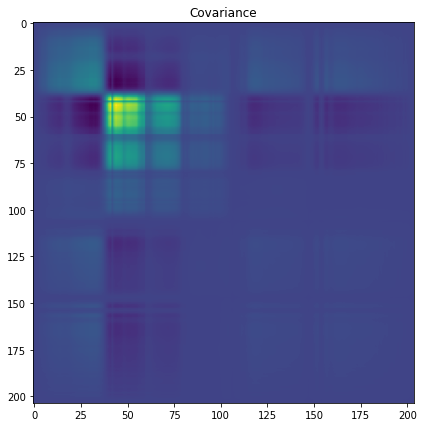

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Covariance')
plt.imshow(Sigma)
plt.show()

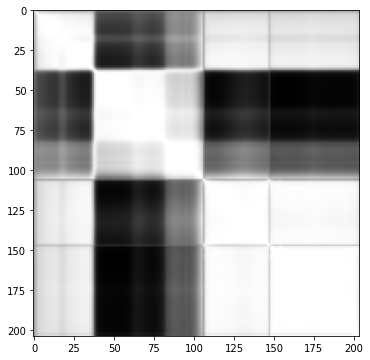

In [19]:
R = np.corrcoef(X,rowvar=False)
plt.figure(figsize=(6,6))
plt.imshow(R, cmap='gray')
plt.show()

### PCA model

In [20]:
# first PCA with by keeping all features
pca_model = PCA()
pca_model.fit(X)

PCA()

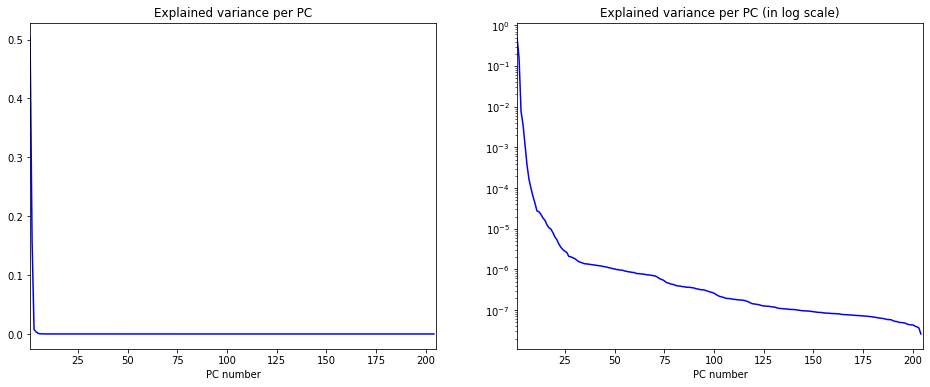

In [21]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Explained variance per PC')
plt.plot(np.arange(1, dim+1), pca_model.explained_variance_,'b')
plt.xlabel('PC number')
plt.xlim(1, dim+1)
plt.subplot(122)
plt.title('Explained variance per PC (in log scale)')
plt.plot(np.arange(1, dim+1), pca_model.explained_variance_,'b')
plt.xlabel('PC number')
plt.xlim(1, dim+1)
plt.yscale('log')
plt.show()

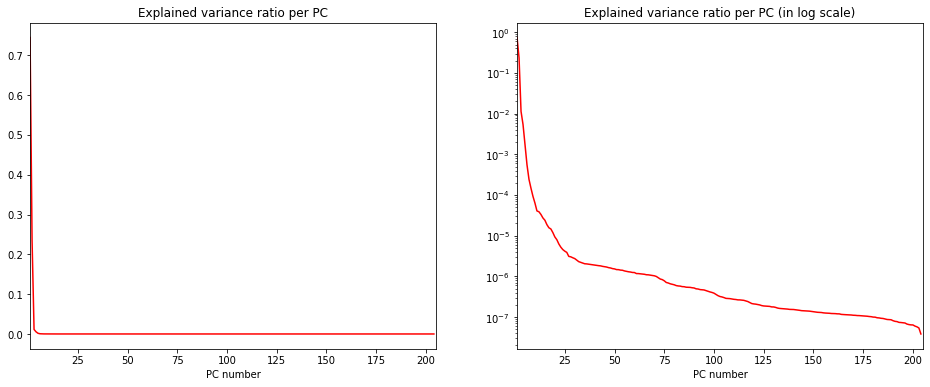

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Explained variance ratio per PC')
plt.plot(np.arange(1, dim+1), pca_model.explained_variance_ratio_,'r')
plt.xlabel('PC number')
plt.xlim(1, dim+1)
plt.subplot(122)
plt.title('Explained variance ratio per PC (in log scale)')
plt.plot(np.arange(1, dim+1), pca_model.explained_variance_ratio_,'r')
plt.xlabel('PC number')
plt.xlim(1, dim+1)
plt.yscale('log')

In [23]:
pca_model.explained_variance_ratio_

array([7.44737128e-01, 2.35313246e-01, 1.13412373e-02, 5.40387401e-03,
       1.73644644e-03, 5.49967557e-04, 2.41974056e-04, 1.46639093e-04,
       9.24879478e-05, 6.31532120e-05, 4.05611987e-05, 3.87179375e-05,
       3.32725264e-05, 2.72985828e-05, 2.39489540e-05, 1.86909351e-05,
       1.56784916e-05, 1.46046215e-05, 1.19200903e-05, 9.31653769e-06,
       7.96704928e-06, 6.25805125e-06, 5.21763992e-06, 4.55567892e-06,
       4.16336375e-06, 3.88410918e-06, 3.09799548e-06, 3.02560500e-06,
       2.86728967e-06, 2.73661754e-06, 2.51101967e-06, 2.30122596e-06,
       2.21472327e-06, 2.13132890e-06, 2.04095412e-06, 2.02507983e-06,
       1.99092566e-06, 1.94789853e-06, 1.93026989e-06, 1.88680354e-06,
       1.86478598e-06, 1.83319378e-06, 1.81098158e-06, 1.76181987e-06,
       1.72777160e-06, 1.69712190e-06, 1.63955118e-06, 1.60753112e-06,
       1.55075079e-06, 1.52571907e-06, 1.46799338e-06, 1.46257475e-06,
       1.42541083e-06, 1.41289509e-06, 1.36029177e-06, 1.32471057e-06,
      

In [24]:
pca_model.explained_variance_ratio_.cumsum()

array([0.74473713, 0.98005037, 0.99139161, 0.99679549, 0.99853193,
       0.9990819 , 0.99932387, 0.99947051, 0.999563  , 0.99962615,
       0.99966671, 0.99970543, 0.99973871, 0.999766  , 0.99978995,
       0.99980864, 0.99982432, 0.99983893, 0.99985085, 0.99986016,
       0.99986813, 0.99987439, 0.99987961, 0.99988416, 0.99988833,
       0.99989221, 0.99989531, 0.99989833, 0.9999012 , 0.99990394,
       0.99990645, 0.99990875, 0.99991096, 0.9999131 , 0.99991514,
       0.99991716, 0.99991915, 0.9999211 , 0.99992303, 0.99992492,
       0.99992678, 0.99992861, 0.99993043, 0.99993219, 0.99993392,
       0.99993561, 0.99993725, 0.99993886, 0.99994041, 0.99994194,
       0.9999434 , 0.99994487, 0.99994629, 0.99994771, 0.99994907,
       0.99995039, 0.99995169, 0.99995297, 0.99995421, 0.99995546,
       0.99995663, 0.9999578 , 0.99995896, 0.9999601 , 0.99996123,
       0.99996232, 0.99996341, 0.99996448, 0.99996553, 0.99996657,
       0.99996756, 0.99996849, 0.99996935, 0.99997018, 0.99997

In [27]:
var_cumsum = pca_model.explained_variance_ratio_.cumsum()
nbPCs = len(var_cumsum[var_cumsum <= 0.9991])
percofvar = var_cumsum[nbPCs]
print('%d components are necessary to retain %1.2f%% of the total variance'%((nbPCs+1),100*percofvar))

7 components are necessary to retain 99.93% of the total variance


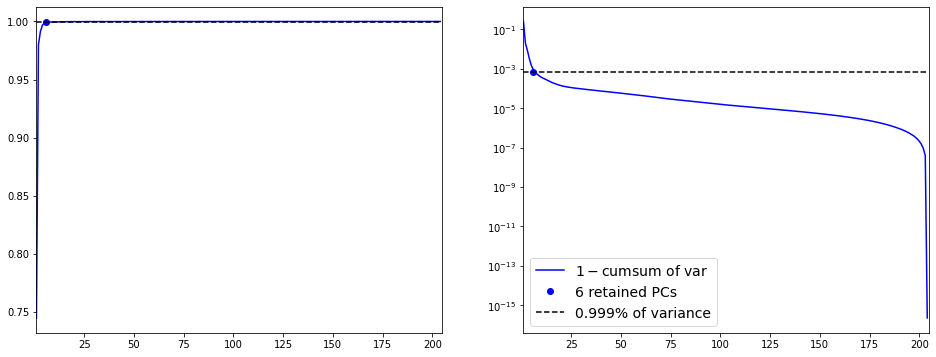

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(np.arange(1,dim+1),var_cumsum,'b')
plt.plot(nbPCs,var_cumsum[nbPCs],'bo')
plt.plot(np.arange(1,dim+1),percofvar*np.ones(dim),'--k')
plt.xlim(1,dim+1)
plt.subplot(122)
plt.plot(np.arange(1,dim+1),1-var_cumsum,'b',label=r'$1-$cumsum of var')
plt.plot(nbPCs,1-var_cumsum[nbPCs],'bo',label='%d retained PCs'%(nbPCs))
plt.plot(np.arange(1,dim+1),1-percofvar*np.ones(dim),'--k',label='%1.3f%% of variance'%percofvar)
plt.xlim(1,dim+1)
plt.yscale('log')
plt.legend(loc='best',fontsize=14)
plt.show()

In [29]:
pca_model = PCA(n_components=7)
pca_model.fit(X)

PCA(n_components=7)

In [30]:
X_reduced = pca_model.transform(X)

In [31]:
X_reduced.shape

(111104, 7)

In [32]:
img.shape

(512, 217, 204)

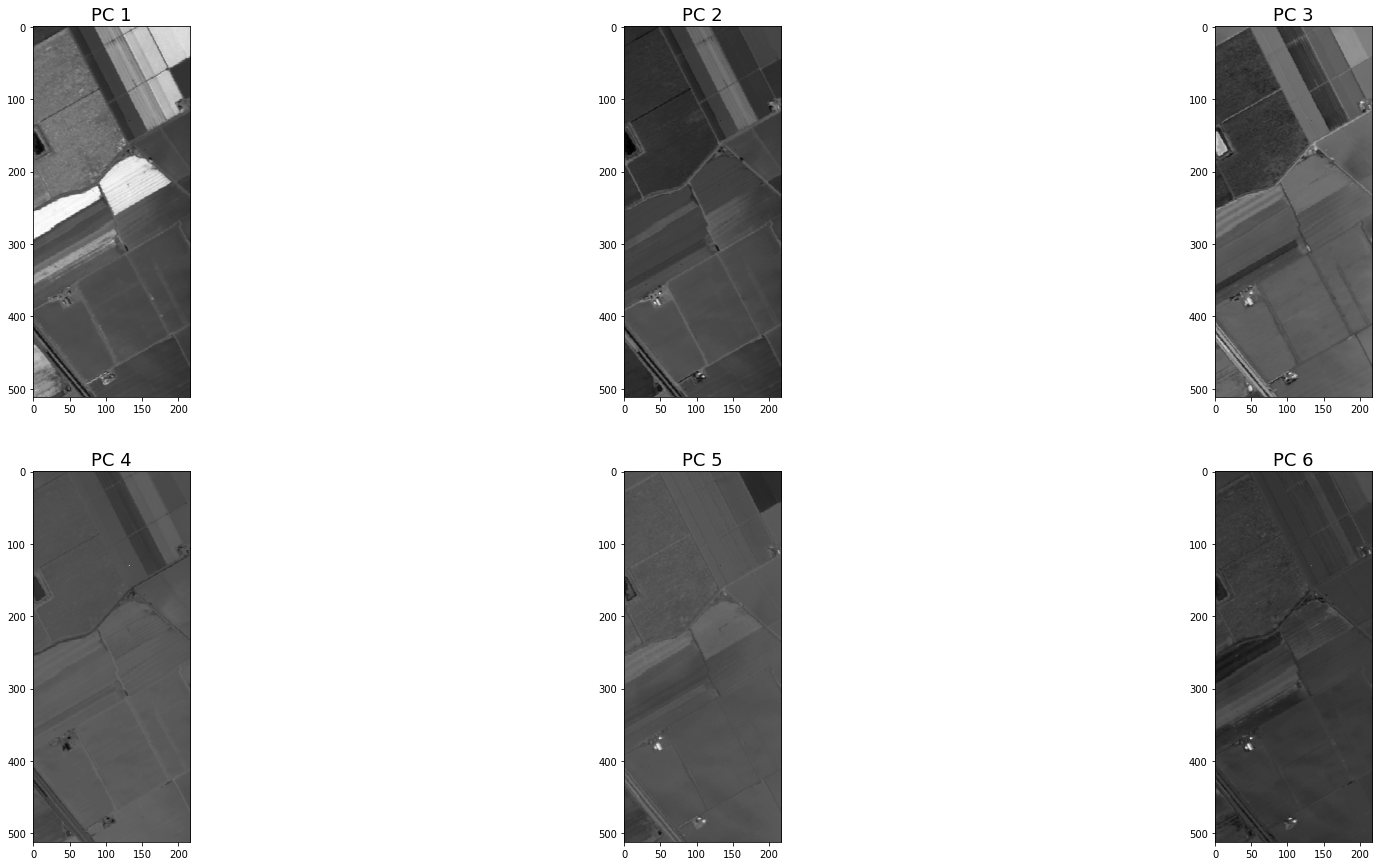

In [35]:
tmp = X_reduced.reshape((512, 217, 7))
plt.figure(figsize=(30,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title('PC %d'%(i+1),fontsize=18)
    plt.imshow(tmp[:,:,i],cmap='gray')
plt.show()

In [37]:
np.unique(labels.flatten())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [41]:
X_reduced.shape

(111104, 7)

### KMeans

In [42]:
# model
model = KMeans(n_clusters=17, verbose=1)

In [43]:
model.fit(X_reduced)

Initialization complete
Iteration 0, inertia 3454.995514323086
Iteration 1, inertia 2711.2938761293153
Iteration 2, inertia 2647.1234808172585
Iteration 3, inertia 2619.4276512502056
Iteration 4, inertia 2601.1684962453674
Iteration 5, inertia 2586.159859023804
Iteration 6, inertia 2570.503964033167
Iteration 7, inertia 2554.578234693123
Iteration 8, inertia 2537.013463890247
Iteration 9, inertia 2516.190693341997
Iteration 10, inertia 2496.7414264770987
Iteration 11, inertia 2481.3938390795274
Iteration 12, inertia 2466.4837502164983
Iteration 13, inertia 2452.343777268662
Iteration 14, inertia 2442.8903972793237
Iteration 15, inertia 2436.7296966538106
Iteration 16, inertia 2433.093001544757
Iteration 17, inertia 2430.232041688092
Iteration 18, inertia 2427.7729133970092
Iteration 19, inertia 2425.214770040185
Iteration 20, inertia 2422.8374446630164
Iteration 21, inertia 2419.9233487203483
Iteration 22, inertia 2416.4035716629946
Iteration 23, inertia 2412.0346382164785
Iteration 24

Iteration 22, inertia 2320.5003337926287
Iteration 23, inertia 2320.029458829593
Iteration 24, inertia 2319.791626307067
Iteration 25, inertia 2319.7145869889277
Iteration 26, inertia 2319.6530064155268
Converged at iteration 26: center shift 9.26938594477942e-06 within tolerance 9.654043843114917e-06.
Initialization complete
Iteration 0, inertia 3275.464554822004
Iteration 1, inertia 2598.6205561574416
Iteration 2, inertia 2529.814935963347
Iteration 3, inertia 2498.991653590456
Iteration 4, inertia 2484.2566179548453
Iteration 5, inertia 2475.799178299002
Iteration 6, inertia 2469.7996760488495
Iteration 7, inertia 2464.5477894654045
Iteration 8, inertia 2460.0203742036056
Iteration 9, inertia 2456.1005301681384
Iteration 10, inertia 2452.3890810192584
Iteration 11, inertia 2449.0736492877345
Iteration 12, inertia 2445.645592377619
Iteration 13, inertia 2442.032745017661
Iteration 14, inertia 2437.7391042174677
Iteration 15, inertia 2432.0974368656907
Iteration 16, inertia 2425.68608

KMeans(n_clusters=17, verbose=1)

In [45]:
model.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [47]:
print(model.labels_.shape)

(111104,)


In [48]:
results = model.labels_.copy()
results = results.reshape((img.shape[0], img.shape[1]))

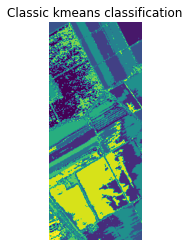

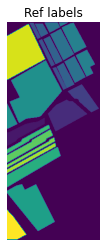

In [50]:
plt.imshow(results)
plt.axis('off')
plt.title('Classic kmeans classification')
plt.show()
plt.imshow(labels)
plt.axis('off')
plt.title('Ref labels')
plt.show()

### GMM model

In [51]:
gmm_model = GaussianMixture(n_components=17, verbose=1)

In [52]:
gmm_model.fit(X_reduced)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(n_components=17, verbose=1)

In [53]:
results = gmm_model.predict(X_reduced)

In [54]:
results

array([16, 16, 16, ...,  3,  3,  7])

In [55]:
results = results.reshape((img.shape[0], img.shape[1]))

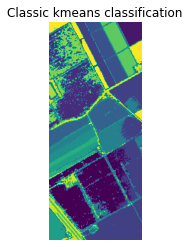

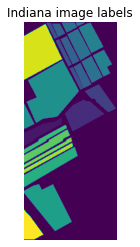

In [56]:
plt.imshow(results)
plt.axis('off')
plt.title('Classic kmeans classification')
plt.show()
plt.imshow(labels)
plt.axis('off')
plt.title('Indiana image labels')
plt.show()